In [1]:
# Enable inline plotting in notebook
%matplotlib inline
# Populate namespace with numerical python function library and matplotlib plotting library.
import matplotlib.pyplot as plt
import numpy as np

This notebook provides an example of the inter-band calibration for Las Cumbres Observatory (LCO) lightcurves.
Similar to the model fitting, the lightcurves are read as follows:
 - Each lightcurve for each telescope is saved as a .dat file where each column is time, flux, flux_err. 
 - The directory for these files is specified
 - The files are named "ObjName"\_"filter"\_"scope".dat

To run the intercalibration, provide the class, InterCalibrate(), with the directory, object name, filter, list of telescopes, and priors. Below is an example for the B band for year 1 of Fairall 9.

The priors are for the extra error parameter and delta, which are uniform where the limits must be specified in the following way:

priors = [[delta_lower, delta_upper], [sig_lower, sig_upper]]

In [3]:
import PyROA
datadir = "/home/fergus/Documents/MPhysProj/GitHub/F9_lightcurves/"
objName="F9"
filter = "B"
    
#List of telescope names
scopes=["1m003", "1m004", "1m005", "1m009", "1m010", "1m011", "1m012", "1m013"]
#Priors
priors = [[0.01, 10.0], [0.0, 2.0]]

fit = PyROA.InterCalibrate(datadir, objName, filter, scopes, priors)

Initial Parameter Values
  A1    B1    σ1    A2    B2    σ2    A3    B3    σ3    A4    B4    σ4    A5    B5    σ5    A6    B6    σ6    A7    B7    σ7    A8    B8    σ8    Δ
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ---
   1     0  0.01     1     0  0.01     1     0  0.01     1     0  0.01     1     0  0.01     1     0  0.01     1     0  0.01     1     0  0.01    1
NWalkers=50


100%|██████████| 15000/15000 [20:45<00:00, 12.05it/s]


0.0 clipped, out of  94 data points
1.0 clipped, out of  147 data points
4.0 clipped, out of  254 data points
0.0 clipped, out of  20 data points
0.0 clipped, out of  106 data points
0.0 clipped, out of  145 data points
0.0 clipped, out of  103 data points
0.0 clipped, out of  12 data points
<A> =  1.000784383693792
<B> =  -0.00024414653507348616


The outputted text shows the number of data points clipped for each telescope. The sigma clipping, does not remove the point but rather expands the error bar to hit the threshold. The averages of the $A$ and $B$ parameters are shown to check if the intercalibration was sucessful. If it is, the average of $A$ should be 1 and the average of $B$ should be zero.

The resulting B band lightcurve is written to the same directory containing the original lightcurves. A corner plot is also outputted as well as the following plot.

The following is a plot showing the resulting B band lightcurve compared to the original telescope lightcurves.

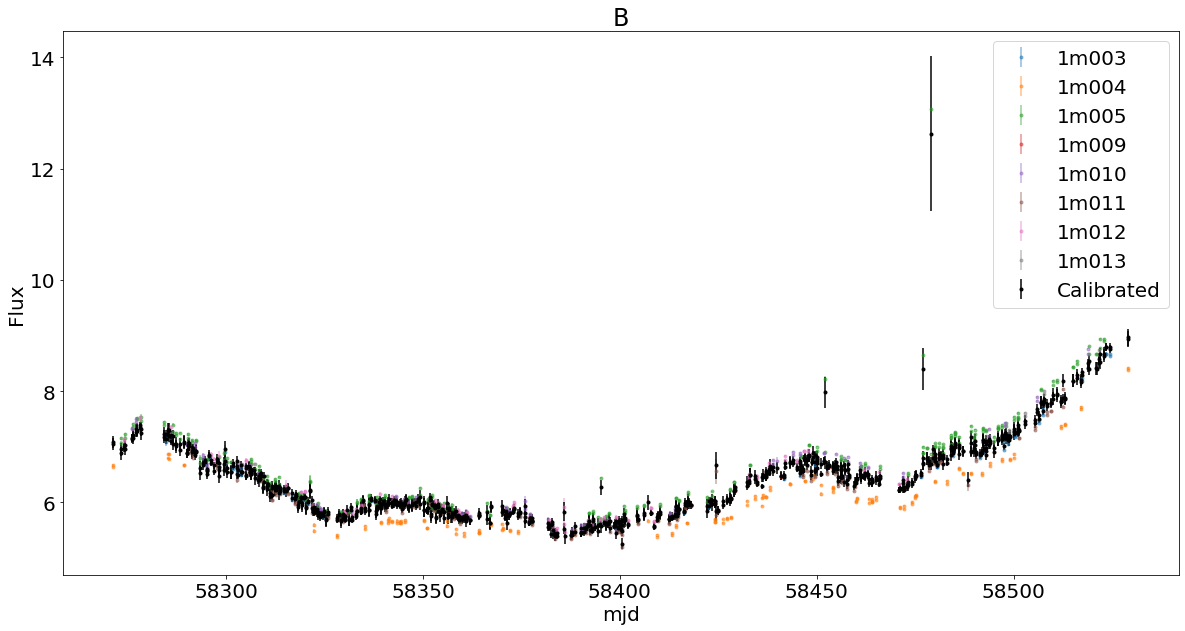

In [4]:
plt.rcParams.update({
    "font.family": "Sans",  
    "font.serif": ["DejaVu"],
"figure.figsize":[20,10],
"font.size": 20})  

#Read in original lightcurves
data=[]
for i in range(len(scopes)):
    file = datadir + str(objName) +"_"+ str(filter) + "_"+ str(scopes[i]) +".dat"
    data.append(np.loadtxt(file))  

plt.title(str(filter))
#Plot data for filter
for i in range(len(data)):
    mjd = data[i][:,0]
    flux = data[i][:,1]
    err = data[i][:,2]
    plt.errorbar(mjd, flux, yerr=err, ls='none', marker=".", label=str(scopes[i]), alpha=0.5)

plt.errorbar(fit.mjd, fit.flux, yerr=fit.err, ls='none', marker=".", color="black", label="Calibrated")

plt.xlabel("mjd")
plt.ylabel("Flux")
plt.legend()